In [1]:
# Setup autoreload
%load_ext autoreload
%autoreload 2

# Give yourself access to common
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import common
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [3]:
# nba_initial = pd.read_csv('cleaned.csv', index_col=[0])
# nba = common.get_cleaned_baseline_data('./data/cleaned_data/base_cleaned.csv')
nba = pd.read_csv('./data/cleaned_data/external_cleaned.csv')
nba = common.add_log_y_values(nba)
nba = nba.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'college','archetype','all_star','all_nba', 'position','team','inflationAdjSalary','salary'])
nba = nba.dropna()
nba = nba.loc[:, (nba != 0).any(axis=0)]
# nba = nba.drop(columns=['position','team'])
nba

,playerName,seasonStartYear,startYear,height,weight,MP,PTS,Age,games,games_started,...,conference_champ,mvp,mvp_rank,mvp_total,player_week_enc,player_week_total,dpoy,dpoy_rank,dpoy_total,inflationAdjSalary_log
0,Michael Jordan,1996,1985.0,78.0,198.0,3090.0,2491.0,32.0,82.0,82.0,...,1,1,1,4,2,20,0,6,0,17.771714
1,Horace Grant,1996,1988.0,82.0,215.0,2286.0,847.0,30.0,63.0,62.0,...,0,0,100000,0,0,0,0,8,0,17.064332
2,Reggie Miller,1996,1988.0,79.0,185.0,2621.0,1606.0,30.0,76.0,76.0,...,0,0,100000,0,1,2,0,100000,0,16.786229
3,Shaquille O'Neal,1996,1993.0,85.0,325.0,1946.0,1434.0,23.0,54.0,52.0,...,0,0,9,0,2,6,0,100000,0,16.737412
4,Gary Payton,1996,1991.0,76.0,180.0,3162.0,1563.0,27.0,81.0,81.0,...,1,0,6,0,0,1,1,1,1,16.689425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461,Adreian Payne,2017,2015.0,82.0,237.0,135.0,63.0,25.0,18.0,0.0,...,0,0,100000,0,0,0,0,100000,0,11.358410
10465,James Young,2017,2015.0,78.0,215.0,220.0,68.0,21.0,29.0,0.0,...,0,0,100000,0,0,0,0,100000,0,11.358410
10471,Darrun Hilliard,2017,2016.0,78.0,205.0,381.0,127.0,23.0,39.0,1.0,...,0,0,100000,0,0,0,0,100000,0,11.358410
10481,Jonathan Gibson,2017,2017.0,74.0,185.0,231.0,106.0,29.0,17.0,0.0,...,0,0,100000,0,0,0,0,100000,0,11.317555


In [12]:
# nba = nba_initial.dropna()
# nba_initial

In [13]:
# nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
# nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace(',', '')
# nba['inflationAdjSalary'] = nba['inflationAdjSalary'].astype(int)
# nba['inflationAdjSalary_log'] = nba['inflationAdjSalary'].apply(lambda x: np.log(x))
# nba

In [4]:
#cols: MP(minutes played), PTS(points), Age, team, games(games played), games_started, PER(player efficiency rating),
# FTr(free throw rating), AST(assists), STL(steals), TRB(total rebounds), FT(free throws), 3P(three points), FG(field goals)
# X = nba[['MP', 'PTS', 'Age', 'games', 'games_started', 'PER', 'FTr', 'AST', 'STL', 'TRB', 'FT', '3P', 'FG']]
# y = nba[['inflationAdjSalary_log']]
# nba = common.add_log_y_values(nba)

# X, y = common.get_X_y_vals(nba)
X_train, X_test, y_train, y_test = common.split_data(nba)
# type(X)
# common.split_data(nba)

In [5]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
y_train

print(len(X_train[0]))

32


In [6]:
#Linear Rgeression model of the form y = w0 + w1x

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2_s=r2_score(y_test, y_pred)
print("MSE: ",mse)
print("r2_socre: ",r2_s)
print("RMSE: ",rmse)
print("MAE:",mae)

MSE:  0.8650257167637688
r2_socre:  0.45235231732492454
RMSE:  0.9300675872020102
MAE: 0.6946153943278396


Text(0.5, 1.0, 'Residual Plot for Linear Regression')

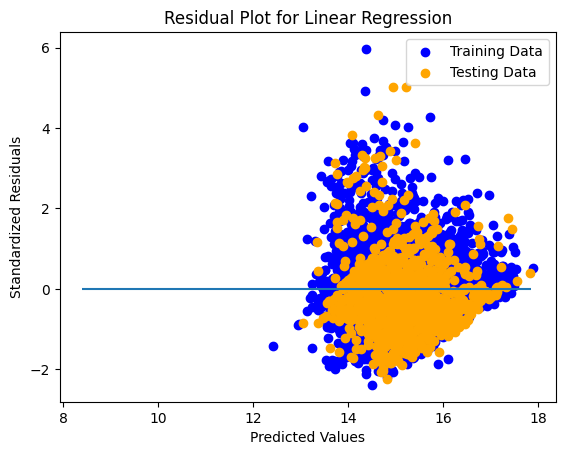

In [7]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.title("Residual Plot for Linear Regression")

<BarContainer object of 32 artists>

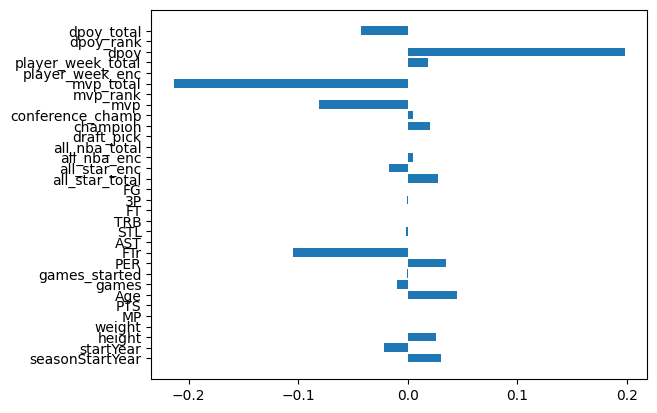

In [8]:
x=['seasonStartYear','startYear','height','weight','MP','PTS','Age','games','games_started','PER','FTr','AST','STL','TRB','FT','3P','FG','all_star_total','all_star_enc','all_nba_enc','all_nba_total','draft_pick','champion','conference_champ','mvp','mvp_rank','mvp_total','player_week_enc','player_week_total','dpoy','dpoy_rank','dpoy_total']
plt.barh(x, regressor.coef_)

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from scipy.stats import uniform 
from scipy.stats import randint


#Without hyperparameter tuning

sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2_s=r2_score(y_test, y_pred)
print("MSE: ",mse)
print("r2_socre: ",r2_s)
print("RMSE: ",rmse)
print("MAE:",mae)

MSE:  1.3599377818131631e+37
r2_socre:  -8.609764546406552e+36
RMSE:  3.687733425578865e+18
MAE: 3.627434621737543e+18


<BarContainer object of 32 artists>

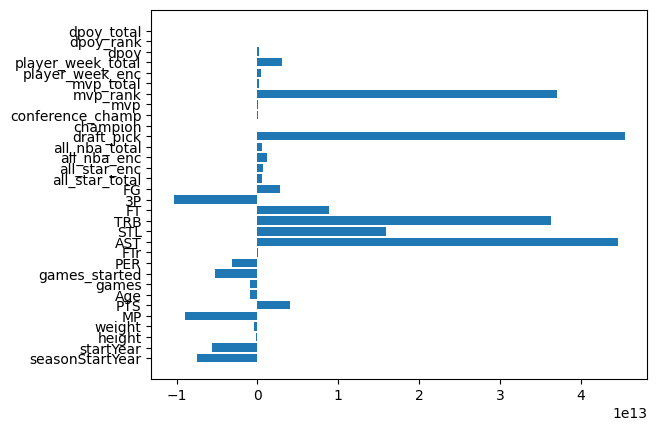

In [10]:
x=['seasonStartYear','startYear','height','weight','MP','PTS','Age','games','games_started','PER','FTr','AST','STL','TRB','FT','3P','FG','all_star_total','all_star_enc','all_nba_enc','all_nba_total','draft_pick','champion','conference_champ','mvp','mvp_rank','mvp_total','player_week_enc','player_week_total','dpoy','dpoy_rank','dpoy_total']
plt.barh(x, sgd.coef_)

In [11]:
#With hyperparameter tuning

parameters = {
                'alpha': uniform(0.00001, 0.001),
                'max_iter': randint(500, 1500),
                'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                'eta0': uniform(0.001,0.1)
            }
model = SGDRegressor()
randm_src = RandomizedSearchCV(estimator=model, 
                               param_distributions = parameters, 
                               cv=5, 
                               n_iter = 100, 
                               n_jobs=-1)
randm_src.fit(X_train, y_train)
# print(" Results from Random Search " )
# print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

best_random = randm_src.best_estimator_
y_pred_sgd = best_random.predict(X_test)

MSE_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
rms_sgd = mean_squared_error(y_test, y_pred_sgd, squared=False)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
print(f"MSE: {MSE_sgd}, R2: {r2_sgd}, RMSE: {rms_sgd}, MAE: {mae_sgd}")


 The best score across ALL searched params:
 -7.742153345394569e+31

 The best parameters across ALL searched params:
 {'alpha': 0.0009167974116799566, 'eta0': 0.0018817698988271227, 'learning_rate': 'adaptive', 'max_iter': 829}
MSE: 9.540360448096999e+31, R2: -6.040001112142777e+31, RMSE: 9767476873838504.0, MAE: 6616275588533100.0


In [20]:
# sgdregressor = SGDRegressor(alpha=randm_src.best_params_['alpha'], max_iter=randm_src.best_params_['max_iter'],
#                             learning_rate=randm_src.best_params_['learning_rate'], eta0=randm_src.best_params_['eta0'])
# # sgdregressor = SGDRegressor()
# # sgdregressor.fit(X_train, y_train.values.reshape((-1,)))  
# # y_pred_sgd = sgdregressor.predict(X_test)

# rfe = RFE(sgdregressor, n_features_to_select=n_features_optimal)             
# rfe = rfe.fit(X_train, y_train.values.reshape((-1,)))

# y_pred_sgd = rfe.predict(X_test)

In [21]:
# MSE_sgd = mean_squared_error(y_test, y_pred_sgd)
# r2_sgd = r2_score(y_test, y_pred_sgd)
# rms_sgd = mean_squared_error(y_test, y_pred_sgd, squared=False)
# mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
# print(f"MSE: {MSE_sgd}, R2: {r2_sgd}, RMSE: {rms_sgd}, MAE: {mae_sgd}")

Text(0.5, 1.0, 'Residual Plot for SGDRegressor')

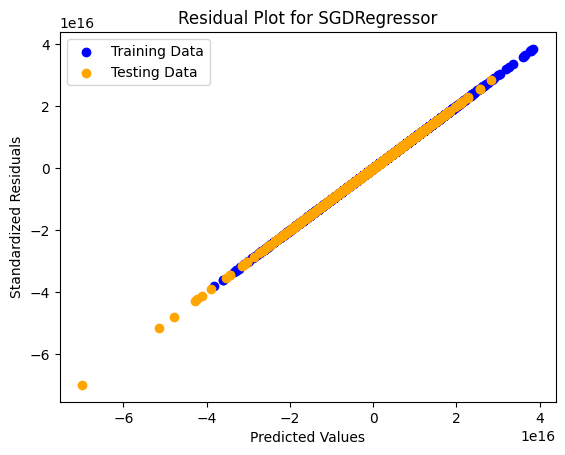

In [12]:
plt.scatter(best_random.predict(X_train), best_random.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(best_random.predict(X_test), best_random.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot for SGDRegressor")

<BarContainer object of 32 artists>

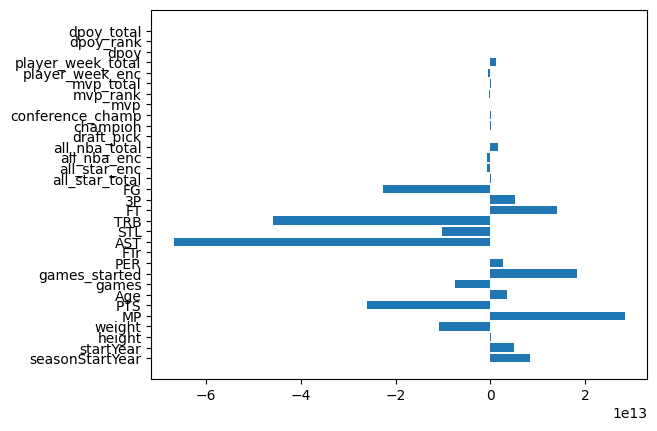

In [13]:
x=['seasonStartYear','startYear','height','weight','MP','PTS','Age','games','games_started','PER','FTr','AST','STL','TRB','FT','3P','FG','all_star_total','all_star_enc','all_nba_enc','all_nba_total','draft_pick','champion','conference_champ','mvp','mvp_rank','mvp_total','player_week_enc','player_week_total','dpoy','dpoy_rank','dpoy_total']
plt.barh(x, best_random.coef_)

In [14]:
from sklearn.linear_model import Lasso

#Without hyperparameter tuning

model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2_s=r2_score(y_test, y_pred)
print("MSE: ",mse)
print("r2_socre: ",r2_s)
print("RMSE: ",rmse)
print("MAE:",mae)

MSE:  0.9004200736003579
r2_socre:  0.4299441540464376
RMSE:  0.948904670449228
MAE: 0.7207816410192928


<BarContainer object of 32 artists>

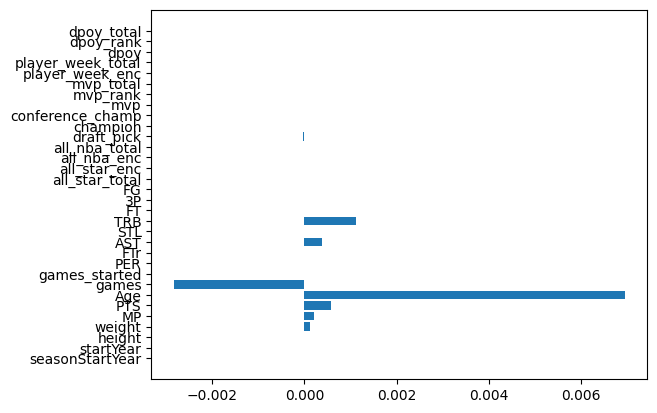

In [15]:
x=['seasonStartYear','startYear','height','weight','MP','PTS','Age','games','games_started','PER','FTr','AST','STL','TRB','FT','3P','FG','all_star_total','all_star_enc','all_nba_enc','all_nba_total','draft_pick','champion','conference_champ','mvp','mvp_rank','mvp_total','player_week_enc','player_week_total','dpoy','dpoy_rank','dpoy_total']
plt.barh(x, model.coef_)

In [17]:
#With hyperparameter tuning

parameters = {
                'alpha': uniform(0, 10)
             }
model = Lasso()
randm_src_lasso = RandomizedSearchCV(estimator=model, 
                                     param_distributions = parameters, 
                                     cv=5, 
                                     n_iter = 100, 
                                     n_jobs=-1)
randm_src_lasso.fit(X_train, y_train)
best_random_lasso = randm_src_lasso.best_estimator_
y_pred_lasso = best_random_lasso.predict(X_test)
# print("\n The best parameters across ALL searched params:\n", randm_src_lasso.best_params_)

# lassoregressor = Lasso(alpha=randm_src_lasso.best_params_['alpha'])
# lassoregressor.fit(X_train, y_train)  
# y_pred_lasso = lassoregressor.predict(X_test)

# rfe = RFE(lassoregressor, n_features_to_select=n_features_optimal)             
# rfe = rfe.fit(X_train, y_train.values)
# y_pred_lasso = rfe.predict(X_test)

MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rms_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"MSE: {MSE_lasso}, R2: {r2_lasso}, RMSE: {rms_lasso}, MAE: {mae_lasso}")

MSE: 0.8578037642262178, R2: 0.45692453465318605, RMSE: 0.9261769616149054, MAE: 0.6959036700060965


Text(0.5, 1.0, 'Residual Plot for Linear Model with L1 regularization')

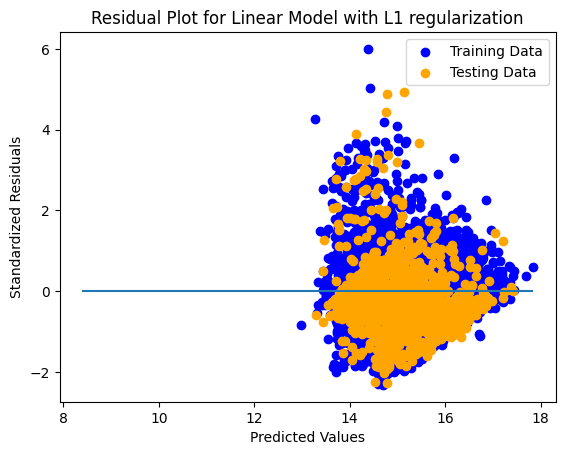

In [18]:
plt.scatter(best_random_lasso.predict(X_train), best_random_lasso.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(best_random_lasso.predict(X_test), best_random_lasso.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot for Linear Model with L1 regularization")

<BarContainer object of 32 artists>

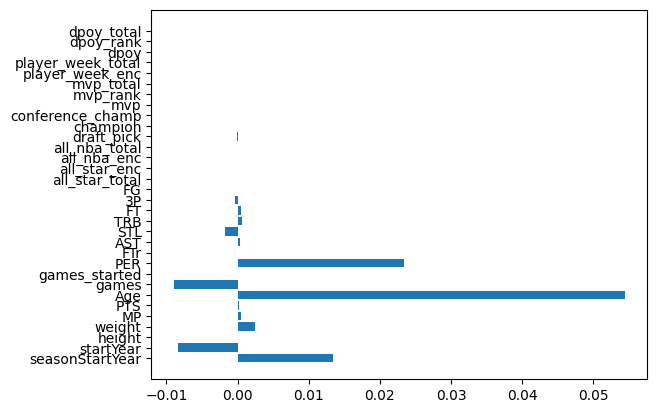

In [19]:
x=['seasonStartYear','startYear','height','weight','MP','PTS','Age','games','games_started','PER','FTr','AST','STL','TRB','FT','3P','FG','all_star_total','all_star_enc','all_nba_enc','all_nba_total','draft_pick','champion','conference_champ','mvp','mvp_rank','mvp_total','player_week_enc','player_week_total','dpoy','dpoy_rank','dpoy_total']
plt.barh(x, best_random_lasso.coef_)

In [20]:
from sklearn.linear_model import Ridge

#With hyperparameter tuning

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2_s=r2_score(y_test, y_pred)
print("MSE: ",mse)
print("r2_socre: ",r2_s)
print("RMSE: ",rmse)
print("MAE:",mae)

MSE:  0.8650093251120248
r2_socre:  0.45236269487777514
RMSE:  0.930058775084685
MAE: 0.6946093389066337


<BarContainer object of 32 artists>

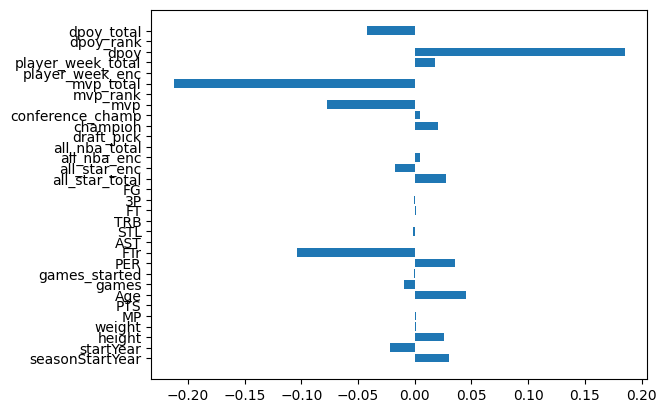

In [21]:
x=['seasonStartYear','startYear','height','weight','MP','PTS','Age','games','games_started','PER','FTr','AST','STL','TRB','FT','3P','FG','all_star_total','all_star_enc','all_nba_enc','all_nba_total','draft_pick','champion','conference_champ','mvp','mvp_rank','mvp_total','player_week_enc','player_week_total','dpoy','dpoy_rank','dpoy_total']
plt.barh(x, model.coef_)

In [22]:
#Without hyperparameter tuning

parameters = {
                'alpha': uniform(0, 10)
             }
model = Ridge()
randm_src_ridge = RandomizedSearchCV(estimator=model, 
                                     param_distributions = parameters, 
                                     cv=5, 
                                     n_iter = 100, 
                                     n_jobs=-1)
randm_src_ridge.fit(X_train, y_train)
best_random_ridge = randm_src_lasso.best_estimator_
y_pred_ridge = best_random_ridge.predict(X_test)
# print("\n The best parameters across ALL searched params:\n", randm_src_ridge.best_params_)

# ridgeregressor = Ridge(alpha=randm_src_ridge.best_params_['alpha'])
# ridgeregressor.fit(X_train, y_train)  
# y_pred_ridge = ridgeregressor.predict(X_test)
# rfe = RFE(ridgeregressor, n_features_to_select=n_features_optimal)             
# rfe = rfe.fit(X_train, y_train.values)
# y_pred_ridge = rfe.predict(X_test)

MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rms_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"MSE: {MSE_ridge}, R2: {r2_ridge}, RMSE: {rms_ridge}, MAE: {mae_ridge}")

MSE: 0.8578037642262178, R2: 0.45692453465318605, RMSE: 0.9261769616149054, MAE: 0.6959036700060965


Text(0.5, 1.0, 'Residual Plot for Linear Model with Ridge regularization')

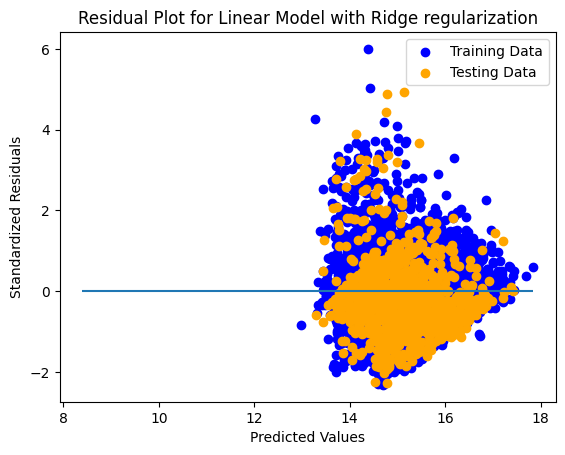

In [23]:
plt.scatter(best_random_ridge.predict(X_train), best_random_ridge.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(best_random_ridge.predict(X_test), best_random_ridge.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot for Linear Model with Ridge regularization")

<BarContainer object of 32 artists>

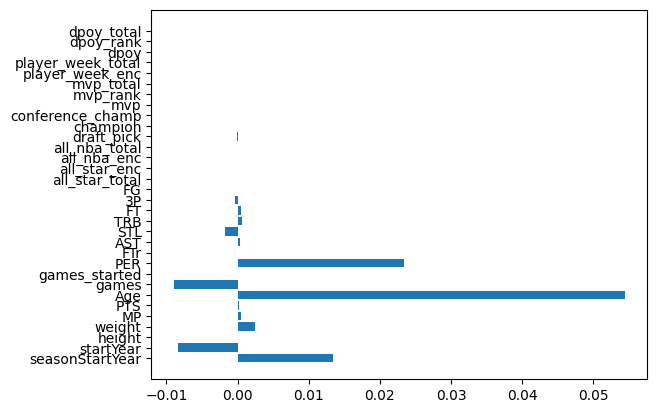

In [24]:
x=['seasonStartYear','startYear','height','weight','MP','PTS','Age','games','games_started','PER','FTr','AST','STL','TRB','FT','3P','FG','all_star_total','all_star_enc','all_nba_enc','all_nba_total','draft_pick','champion','conference_champ','mvp','mvp_rank','mvp_total','player_week_enc','player_week_total','dpoy','dpoy_rank','dpoy_total']
plt.barh(x, best_random_ridge.coef_)

In [25]:
from sklearn.linear_model import LassoCV

lassocvregressor = LassoCV()
lassocvregressor.fit(X_train, y_train)  
y_pred_lassocv = lassocvregressor.predict(X_test)

MSE_lassocv = mean_squared_error(y_test, y_pred_lassocv)
r2_lassocv = r2_score(y_test, y_pred_lassocv)
rms_lassocv = mean_squared_error(y_test, y_pred_lassocv, squared=False)
mae_lassocv = mean_absolute_error(y_test, y_pred_lassocv)

print(f"MSE: {MSE_lassocv}, R2: {r2_lassocv}, RMSE: {rms_lassocv}, MAE: {mae_lassocv}")

MSE: 0.9238891443130226, R2: 0.4150858880535916, RMSE: 0.9611915232215807, MAE: 0.737258772897364


Text(0.5, 1.0, 'Residual Plot for LassoCV model')

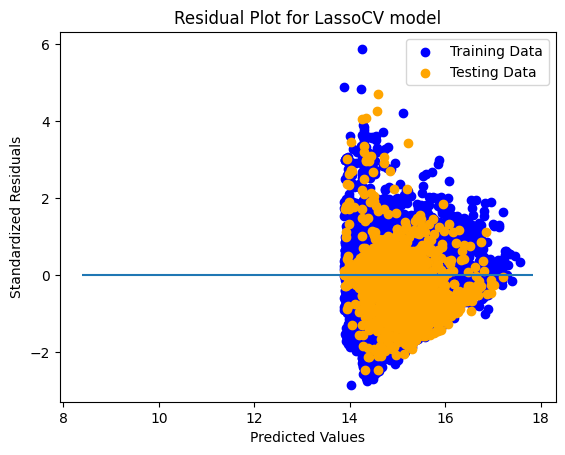

In [26]:
plt.scatter(lassocvregressor.predict(X_train), lassocvregressor.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(lassocvregressor.predict(X_test), lassocvregressor.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot for LassoCV model")

<BarContainer object of 32 artists>

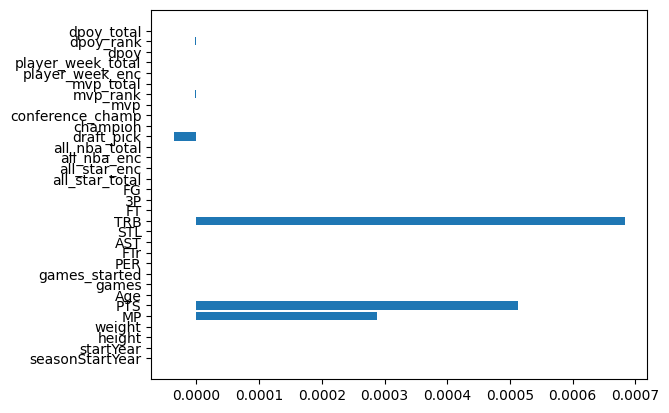

In [27]:
x=['seasonStartYear','startYear','height','weight','MP','PTS','Age','games','games_started','PER','FTr','AST','STL','TRB','FT','3P','FG','all_star_total','all_star_enc','all_nba_enc','all_nba_total','draft_pick','champion','conference_champ','mvp','mvp_rank','mvp_total','player_week_enc','player_week_total','dpoy','dpoy_rank','dpoy_total']
plt.barh(x, lassocvregressor.coef_)